In [1]:
import pandas as pd

# Loading the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\lefen\\Downloads\\data.csv")

# Displaying the first few rows of the DataFrame to get an overview of the features
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


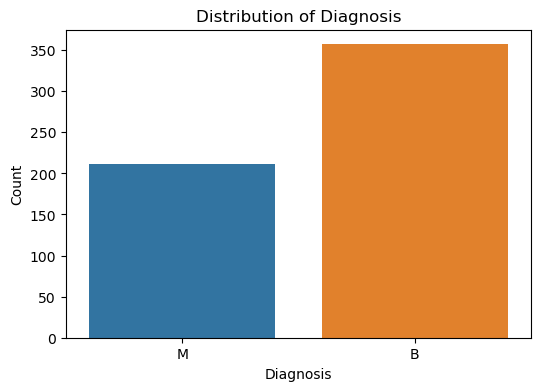

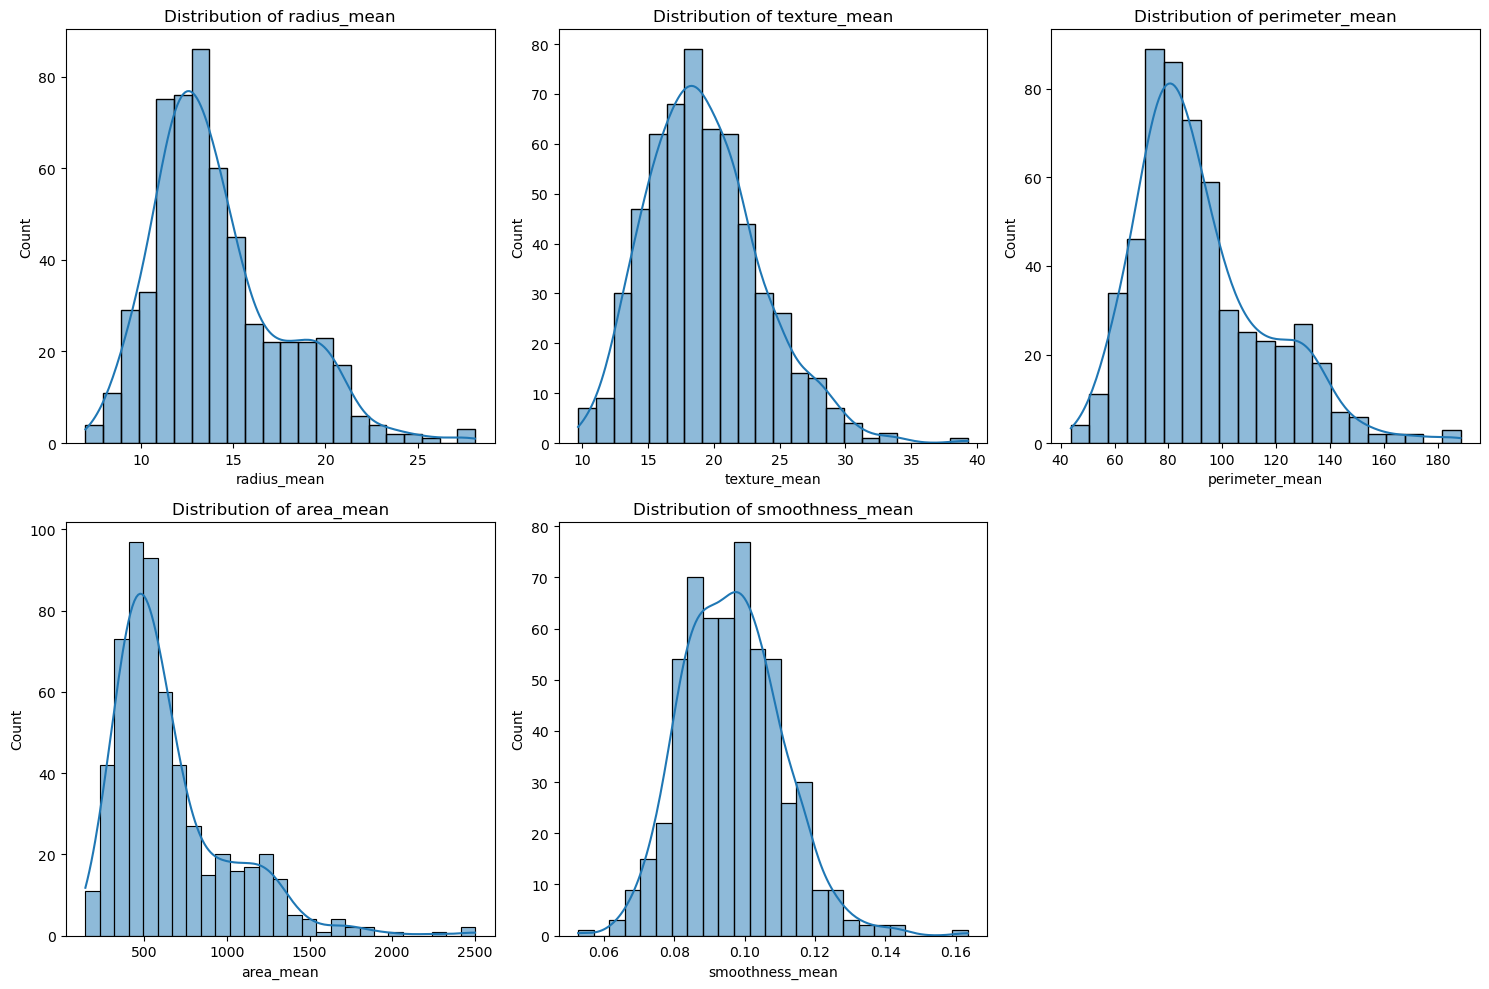

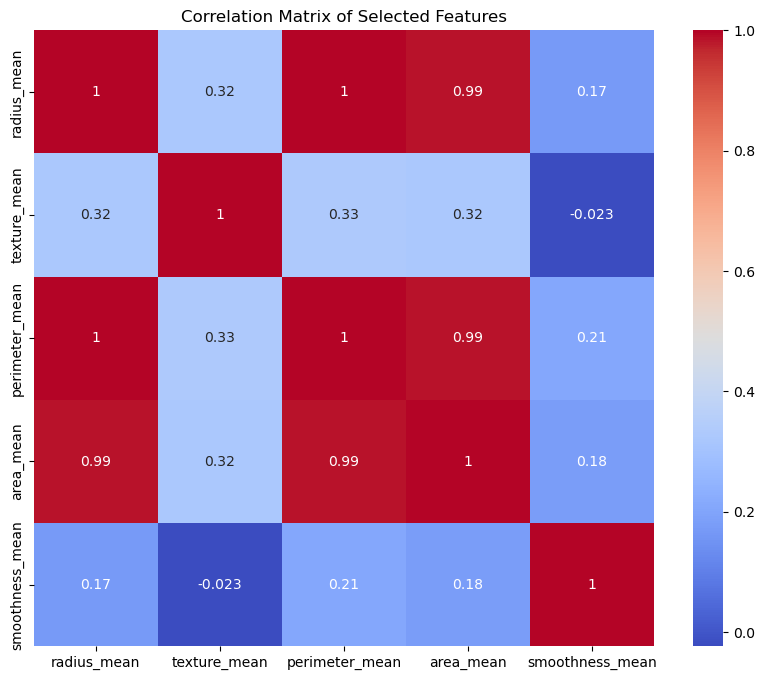

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Distribution of the target variable (diagnosis)
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df) 
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Distribution of features
# For brevity, i will only plot the distributions of a subset of the features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()


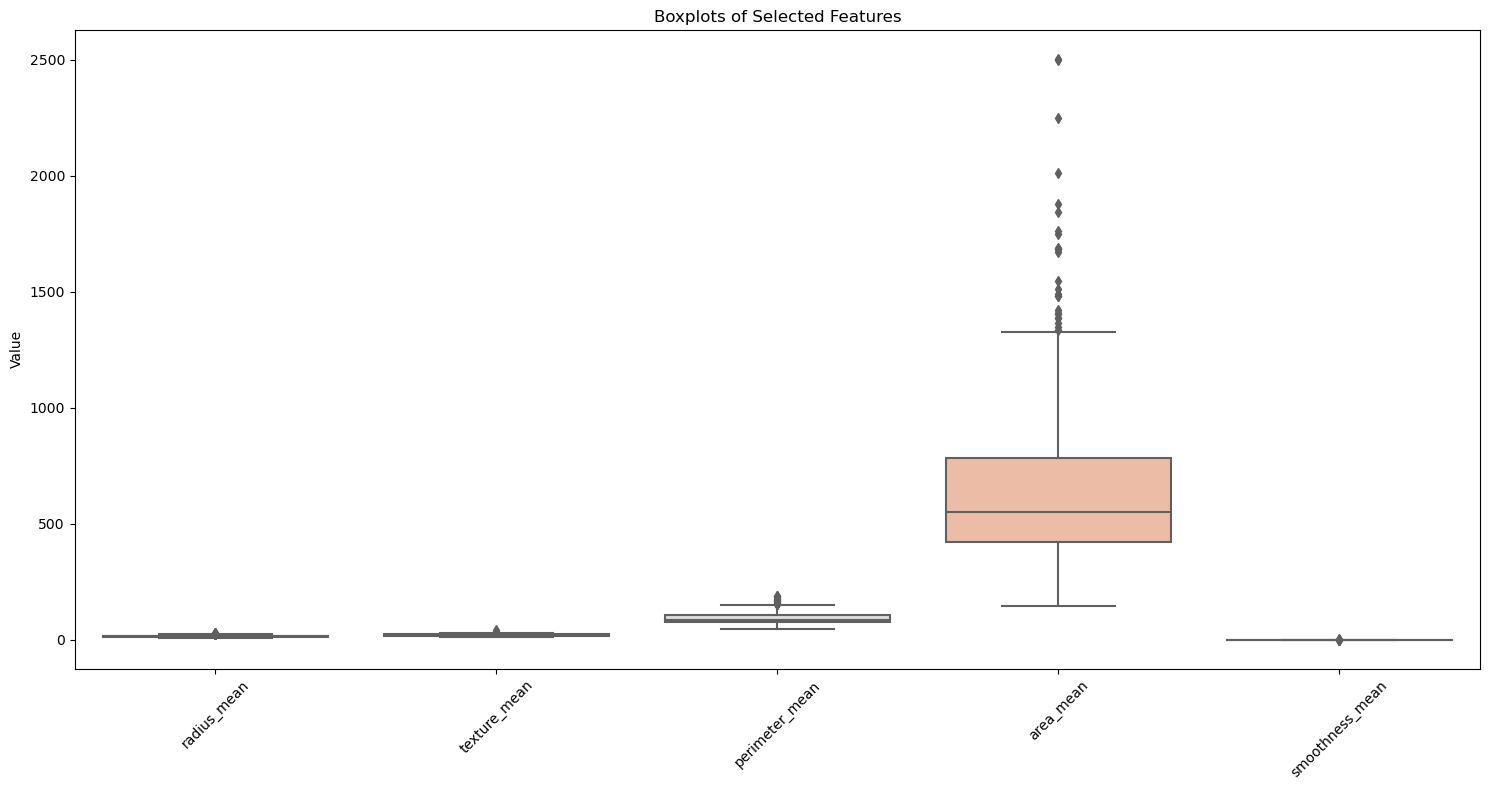

In [4]:
# Features for plotting
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Generate the Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features_to_plot], palette="coolwarm")
plt.title('Boxplots of Selected Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


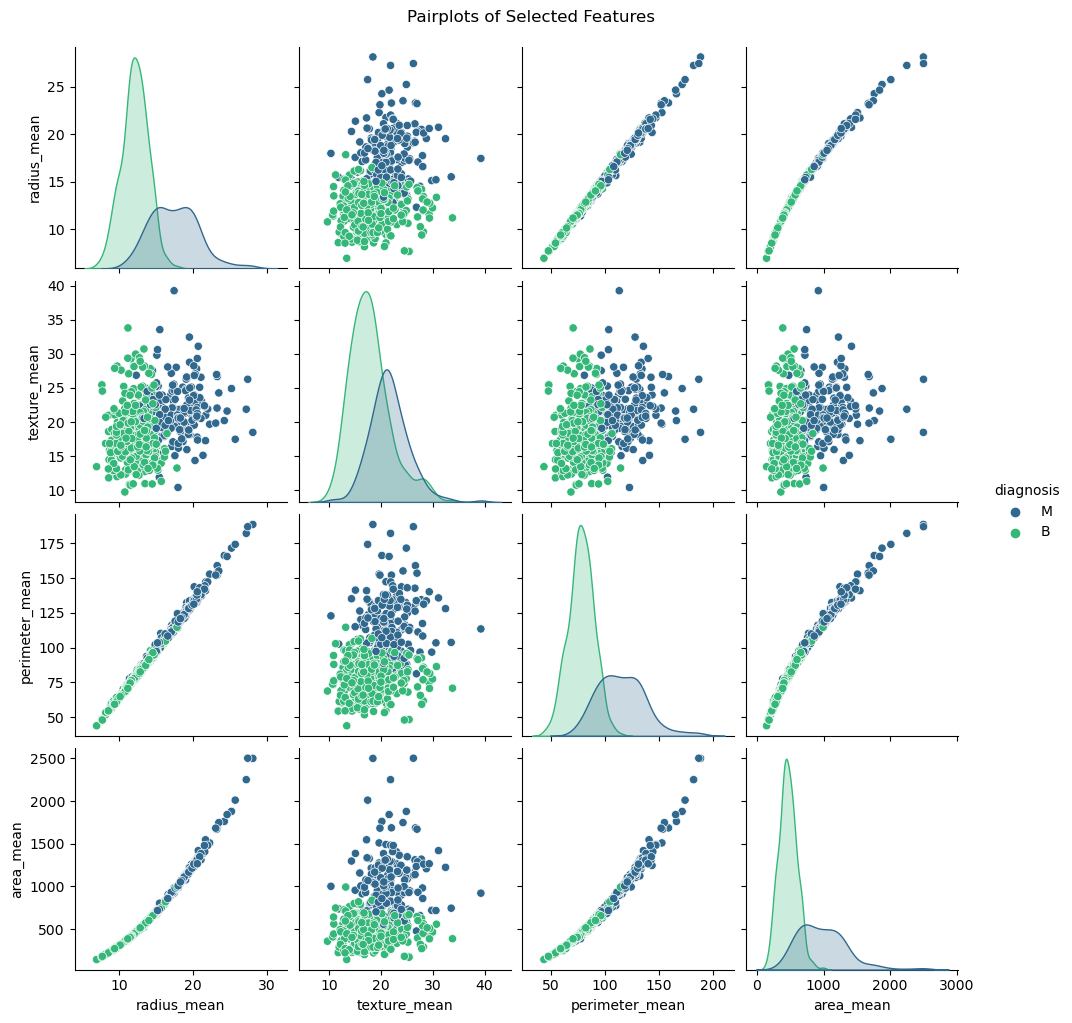

In [5]:
# Generating Pairplots for a subset of features
subset_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[subset_features], hue='diagnosis', palette="viridis")
plt.suptitle('Pairplots of Selected Features', y=1.02)
plt.show()

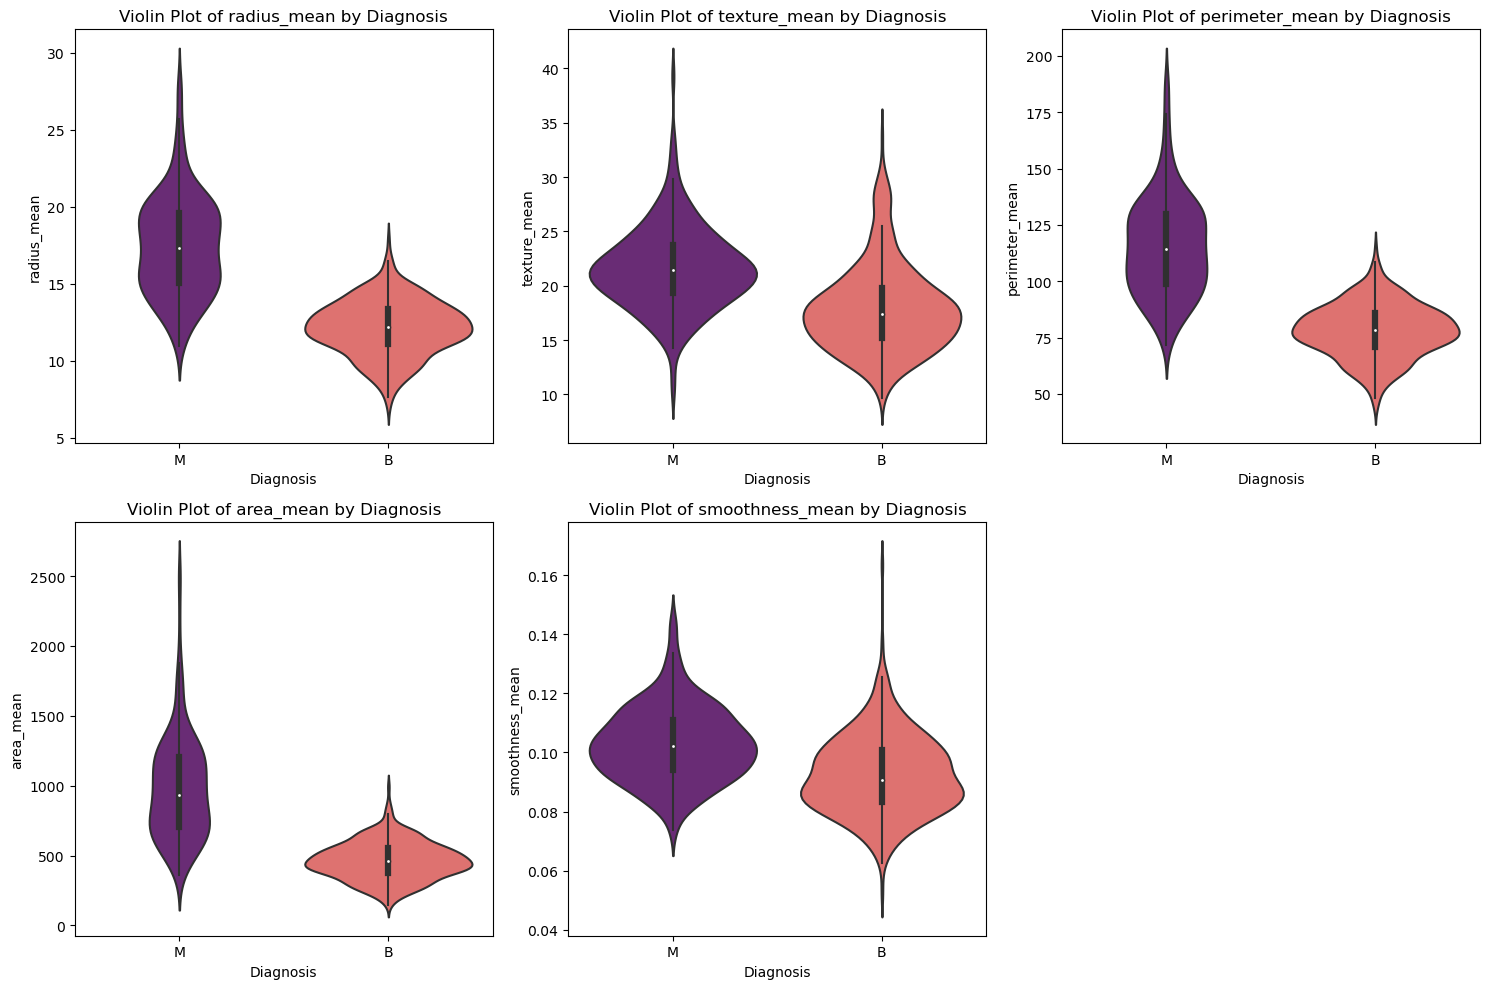

In [6]:
# Generating Violin plots for a subset of features with respect to the diagnosis

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=df['diagnosis'], y=df[feature], palette="magma")
    plt.title(f'Violin Plot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

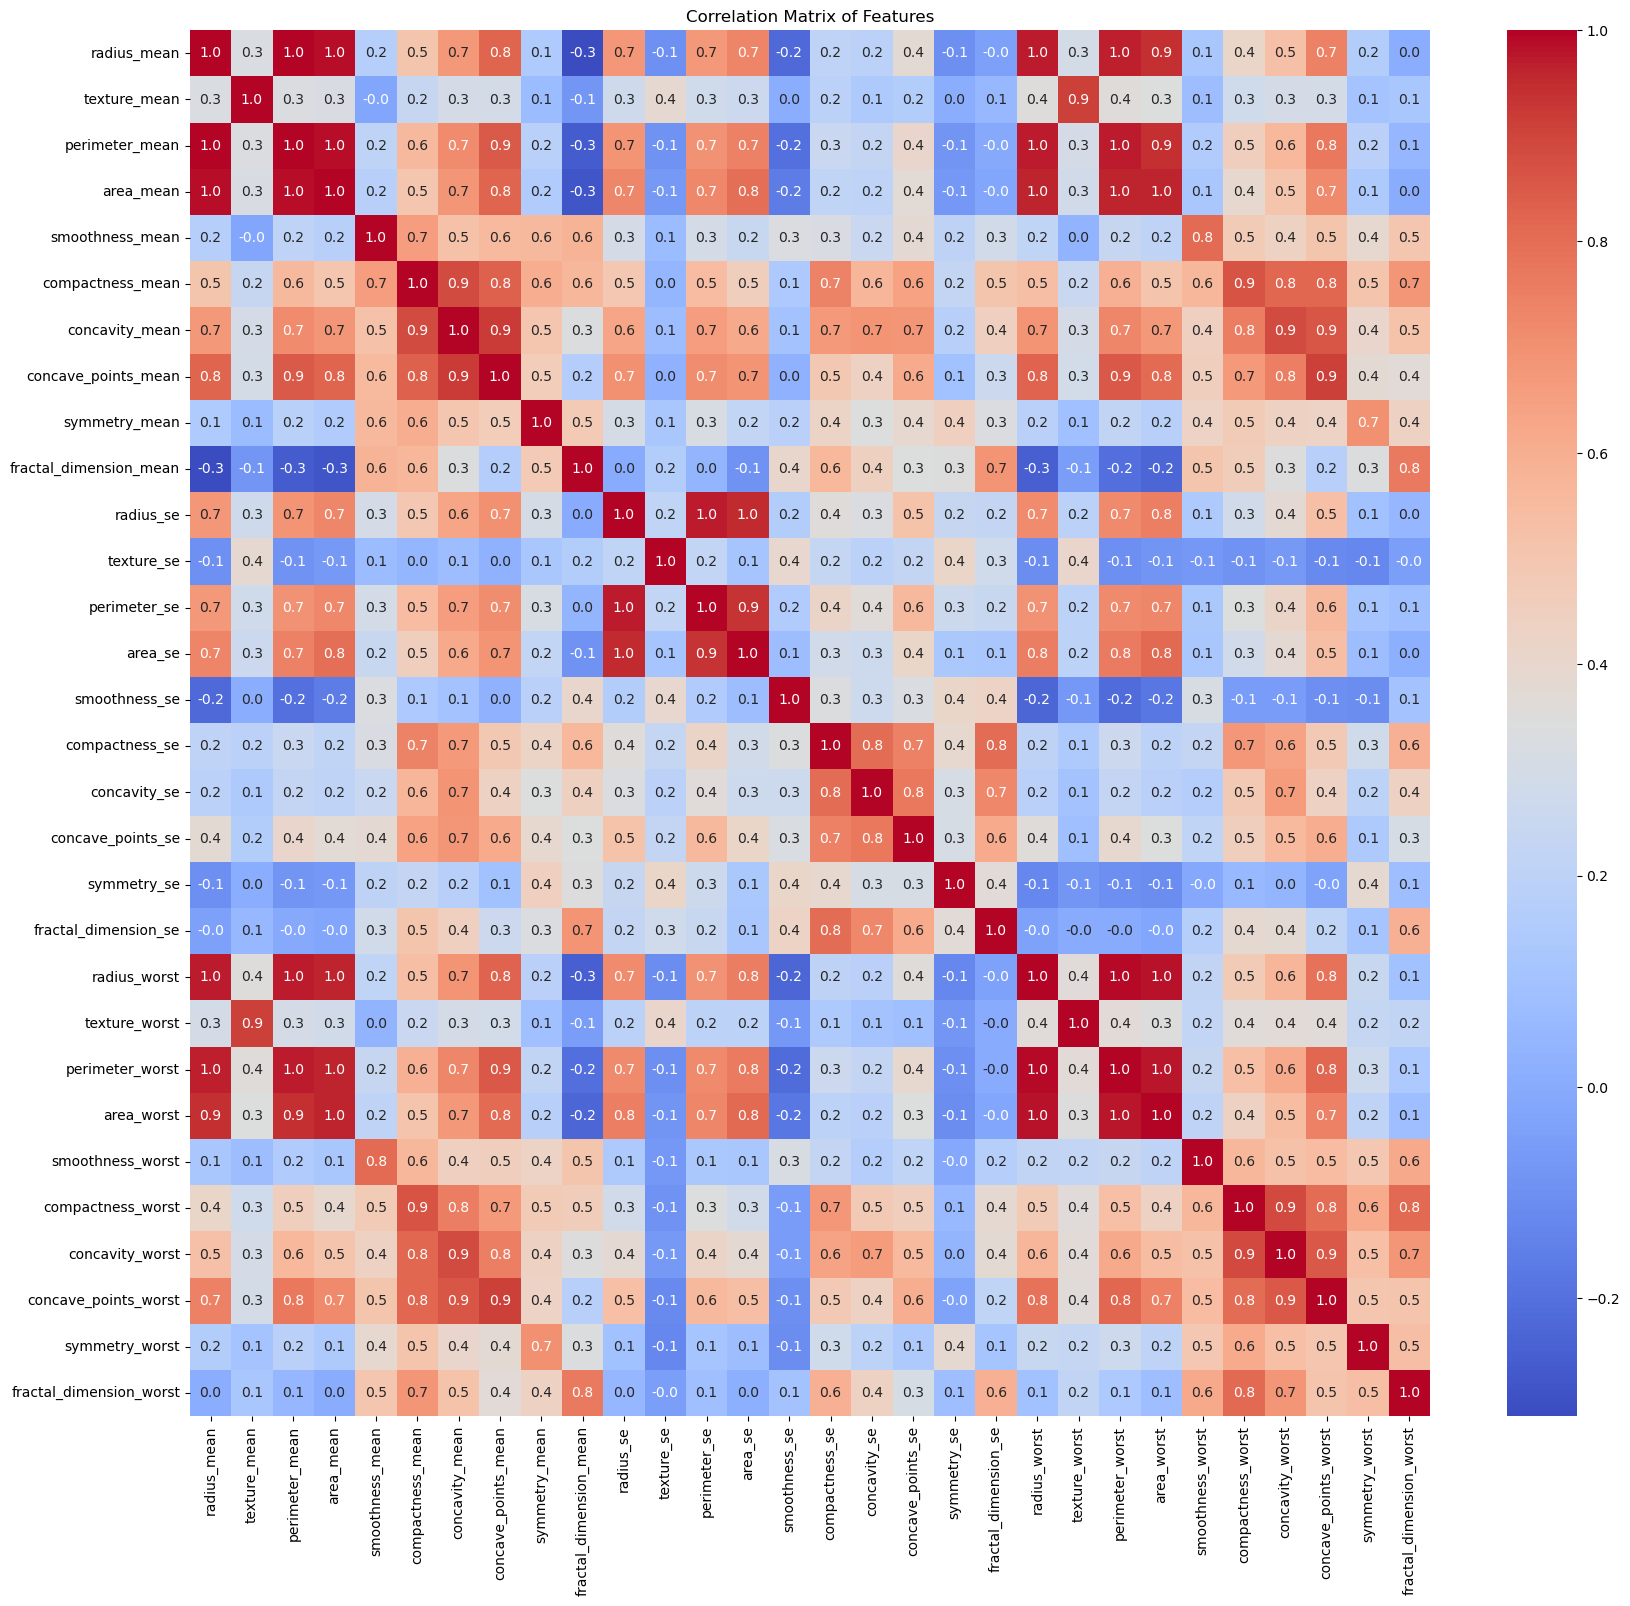

In [8]:
# Generating a Heatmap to visualize the correlation among features
import warnings
warnings.filterwarnings('ignore')
correlation_matrix_full = df.drop(columns=['id']).corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Features')
plt.show()

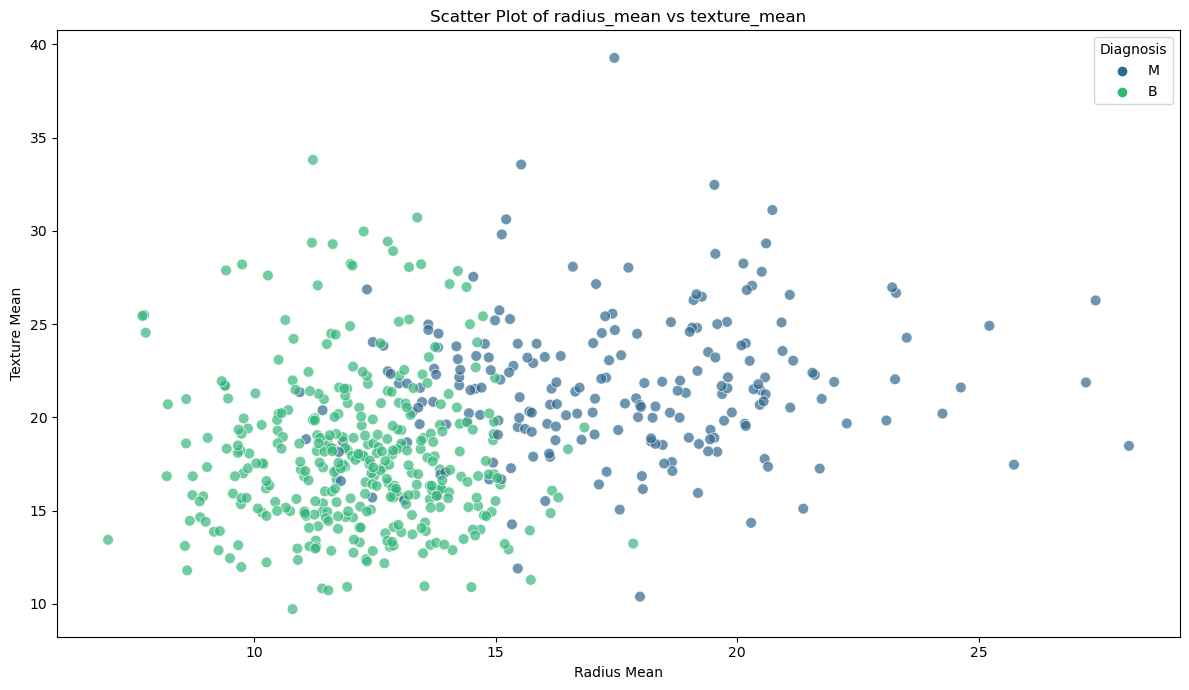

In [9]:
# Scatter Plot for 'radius_mean' vs 'texture_mean' colored by diagnosis
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['radius_mean'], y=df['texture_mean'], hue=df['diagnosis'], palette="viridis", s=60, alpha=0.7)
plt.title('Scatter Plot of radius_mean vs texture_mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis', loc='upper right')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Data Preprocessing

# Convert categorical variable diagnosis to numerical
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Splitting the data into training and testing sets
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((398, 30), (171, 30), (398,), (171,))

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 3. Model Training & Evaluation

# Defining the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Training the models and evaluating their performance
model_accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Sorting the models based on accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

sorted_models


[('Logistic Regression', 0.9824561403508771),
 ('Support Vector Machine', 0.9766081871345029),
 ('Random Forest', 0.9707602339181286),
 ('K-Nearest Neighbors', 0.9590643274853801)]

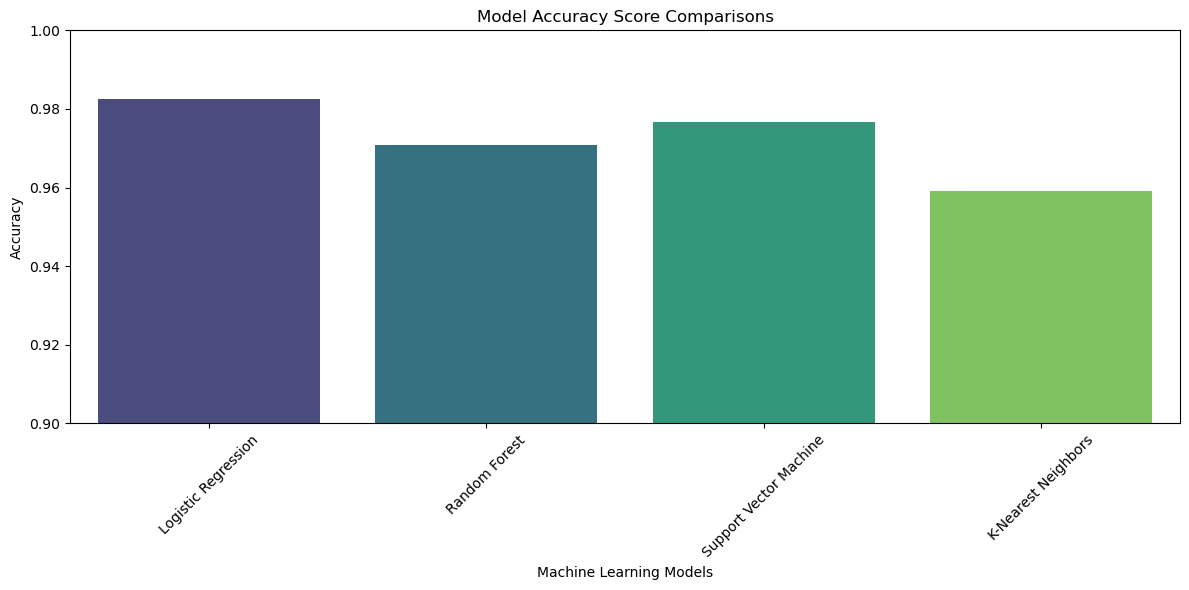

In [12]:
# Creating a bar plot of the model accuracy scores

plt.figure(figsize=(12, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Score Comparisons')
plt.ylabel('Accuracy')
plt.xlabel('Machine Learning Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()